In [1]:
import sys
import numpy as np
sys.path.insert(1,'/Users/lanke/Desktop/Second year project/Code/python_source/')
from chiphifunc import *
from math_utilities import *
from chiphiepsfunc import *
from chiphifunc_test_suite import *
import time

chiphifunc.regularize_phi = True

# for debugging
import scipy.interpolate

Detected 16 CPU's. Setting n_jobs to #CPU/2.


## Testing display_content()


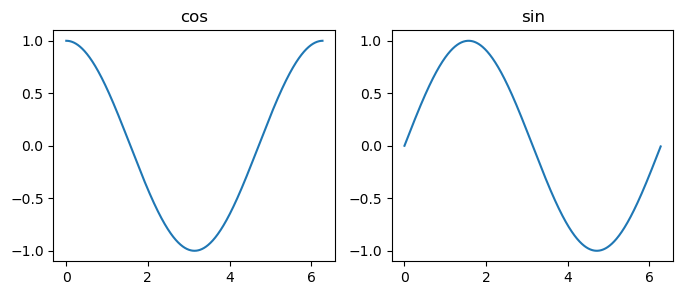

In [3]:
content1 = np.array([
    np.sin(points), # sin component
    np.cos(points) # cos compon|ent
])

ChiPhiFunc(content1, 1, fourier_mode = True).display_content()

## Defining test variables

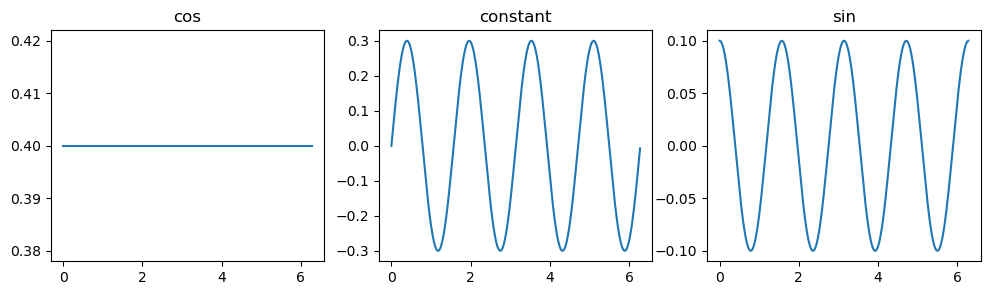

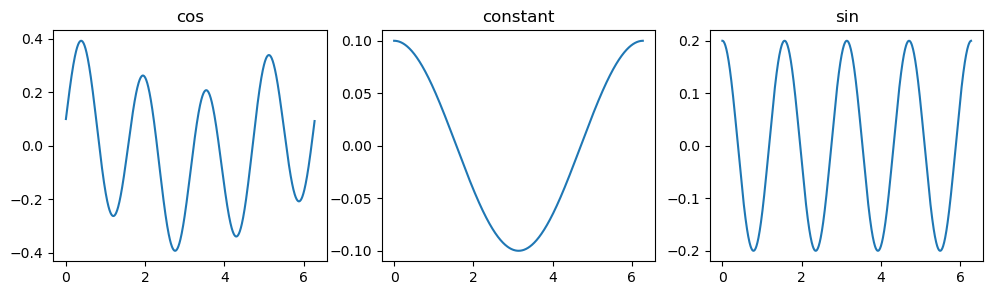

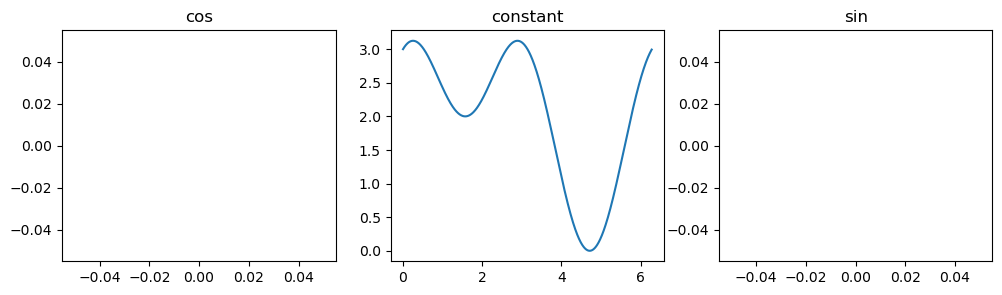

In [4]:
# Generating 2 random test cases and answers

# Creating 2 random ChiPhiFunc's for testing
rands1 = np.random.randint(5, size=12)
func1 = np.vectorize(lambda chi, phi : \
    (rands1[0]/10*np.sin(rands1[1]*phi) + rands1[2]/10*np.cos(rands1[3]*phi))*np.sin(2*chi)+\
    rands1[4]/10*np.sin(rands1[5]*phi) + rands1[6]/10*np.cos(rands1[7]*phi)+\
    (rands1[8]/10*np.sin(rands1[9]*phi) + rands1[10]/10*np.cos(rands1[11]*phi))*np.cos(2*chi))

content1 = np.array([
    rands1[0]/10*np.sin(rands1[1]*points) + rands1[2]/10*np.cos(rands1[3]*points),
    rands1[4]/10*np.sin(rands1[5]*points) + rands1[6]/10*np.cos(rands1[7]*points),
    rands1[8]/10*np.sin(rands1[9]*points) + rands1[10]/10*np.cos(rands1[11]*points)
])
max_phi_mode_1 = np.max(np.array([
    rands1[1],rands1[3],rands1[5],rands1[7],rands1[9],rands1[11]
]))

rands2 = np.random.randint(5, size=12)
func2 = np.vectorize(lambda chi, phi : \
    (rands2[0]/10*np.sin(rands2[1]*phi) + rands2[2]/10*np.cos(rands2[3]*phi))*np.sin(2*chi)+\
    rands2[4]/10*np.sin(rands2[5]*phi) + rands2[6]/10*np.cos(rands2[7]*phi)+\
    (rands2[8]/10*np.sin(rands2[9]*phi) + rands2[10]/10*np.cos(rands2[11]*phi))*np.cos(2*chi))
content2 = np.array([
    rands2[0]/10*np.sin(rands2[1]*points) + rands2[2]/10*np.cos(rands2[3]*points),
    rands2[4]/10*np.sin(rands2[5]*points) + rands2[6]/10*np.cos(rands2[7]*points),
    rands2[8]/10*np.sin(rands2[9]*points) + rands2[10]/10*np.cos(rands2[11]*points)
])
max_phi_mode_2 = np.max(np.array([
    rands2[1],rands2[3],rands2[5],rands2[7],rands2[9],rands2[11]
]))

randsodd = np.random.randint(5, size=16)
funcodd = np.vectorize(lambda chi, phi : \
    (randsodd[0]/10*np.sin(randsodd[1]*phi) + randsodd[2]/10*np.cos(randsodd[3]*phi))*np.sin(3*chi)+\
    (randsodd[4]/10*np.sin(randsodd[5]*phi) + randsodd[6]/10*np.cos(randsodd[7]*phi))*np.sin(1*chi)+\
    (randsodd[8]/10*np.sin(randsodd[9]*phi) + randsodd[10]/10*np.cos(randsodd[11]*phi))*np.cos(1*chi)+\
    (randsodd[12]/10*np.sin(randsodd[13]*phi) + randsodd[14]/10*np.cos(randsodd[15]*phi))*np.cos(3*chi))
contentodd = np.array([
    randsodd[0]/10*np.sin(randsodd[1]*points) + randsodd[2]/10*np.cos(randsodd[3]*points),
    randsodd[4]/10*np.sin(randsodd[5]*points) + randsodd[6]/10*np.cos(randsodd[7]*points),
    randsodd[8]/10*np.sin(randsodd[9]*points) + randsodd[10]/10*np.cos(randsodd[11]*points),
    randsodd[12]/10*np.sin(randsodd[13]*points) + randsodd[14]/10*np.cos(randsodd[15]*points)
])
max_phi_mode_odd = np.max(np.array([
    randsodd[1],randsodd[3],randsodd[5],
    randsodd[7],randsodd[9],randsodd[11],
    randsodd[13],randsodd[15]
]))


rands3 = np.random.randint(low=1, high=5, size=2)
func_no_chi = np.vectorize(lambda chi, phi : 
    np.sin(rands3[0]*phi) + np.cos(rands3[1]*phi)+2)
content_no_chi = np.array([
    np.sin(rands3[0]*points) + np.cos(rands3[1]*points) + 2
])
max_phi_mode_no_chi = np.max(np.array([
    rands3[0],rands3[1]
]))


test1 = ChiPhiFunc(content1, max_phi_mode_1, fourier_mode = True)
test2 = ChiPhiFunc(content2, max_phi_mode_2, fourier_mode = True)
testodd = ChiPhiFunc(contentodd,max_phi_mode_odd, fourier_mode = True)
test_no_chi = ChiPhiFunc(content_no_chi,max_phi_mode_no_chi, fourier_mode = True)

# plt.pcolormesh(chi, phi, func1_result)
# plt.show()
test1.display_content()
test2.display_content()
test_no_chi.display_content()

funcodd_result = evaluate(funcodd)
func1_result = evaluate(func1)
func2_result = evaluate(func2)
func_no_chi_result = evaluate(func_no_chi)


## Testing basic operations

In [5]:
print('Testing lambda:')
print_fractional_error(evaluate_ChiPhiFunc(testodd), (funcodd_result))

Testing lambda:
Error type:     Fractional      Total          
Avg:            2.975e-16       1.709e-17      
Worst:          8.725e-12       2.238e-16      
Std             2.825e-14       2.827e-17      
Total imaginary component
0.0



In [6]:
print('Testing +:')
print('Odd-odd. max_phi_mode:', (testodd+testodd).max_phi_mode, ', content:')
print_fractional_error(evaluate_ChiPhiFunc(testodd+testodd), (funcodd_result+funcodd_result))
print('Even-even. max_phi_mode:', (test1+test2+1).max_phi_mode, ', content:')
print_fractional_error(evaluate_ChiPhiFunc(test1+test2+1), (func1_result+func2_result+1))

print('Testing -. max_phi_mode:', (test1-test2-test_no_chi).max_phi_mode, ', content:')
print_fractional_error(evaluate_ChiPhiFunc(test1-test2-test_no_chi), (func1_result-func2_result-func_no_chi_result))

print('Testing *:')
print('Odd-odd. max_phi_mode:', (testodd*testodd).max_phi_mode, ', content:')
print_fractional_error(evaluate_ChiPhiFunc(testodd*testodd), (funcodd_result*funcodd_result))
print('Even-even. max_phi_mode:', (test1*test2).max_phi_mode, ', content:')
print_fractional_error(evaluate_ChiPhiFunc(test1*test2), (func1_result*func2_result))
print('Even-odd. max_phi_mode:', (test1*testodd).max_phi_mode, ', content:')
print_fractional_error(evaluate_ChiPhiFunc(test1*testodd), (func1_result*funcodd_result))

print('Testing /:')
print('Even. max_phi_mode:', (test1/(test_no_chi+10)).max_phi_mode, ', content:')
print_fractional_error(evaluate_ChiPhiFunc(test1/(test_no_chi+10)), (func1_result/(func_no_chi_result+10)))
print('Odd. max_phi_mode:', (testodd/(test_no_chi+10)).max_phi_mode, ', content:')
print_fractional_error(evaluate_ChiPhiFunc(testodd/(test_no_chi+10)), (funcodd_result/(func_no_chi_result+10)))


print('Testing **. max_phi_mode:', (test1**3).max_phi_mode, ', content:')
print_fractional_error(evaluate_ChiPhiFunc(test1**3), (func1_result*func1_result*func1_result))
print_fractional_error(evaluate_ChiPhiFunc(testodd**3), (funcodd_result*funcodd_result*funcodd_result))


Testing +:
Odd-odd. max_phi_mode: 4 , content:
Error type:     Fractional      Total          
Avg:            2.975e-16       3.419e-17      
Worst:          8.725e-12       4.475e-16      
Std             2.825e-14       5.655e-17      
Total imaginary component
0.0

Even-even. max_phi_mode: 4 , content:
Error type:     Fractional      Total          
Avg:            8.621e-17       7.775e-17      
Worst:          8.030e-16       4.441e-16      
Std             1.064e-16       9.773e-17      
Total imaginary component
0.0

Testing -. max_phi_mode: 4 , content:
Error type:     Fractional      Total          
Avg:            1.682e-16       1.519e-16      
Worst:          1.181e-12       8.882e-16      
Std             3.511e-15       1.965e-16      
Total imaginary component
0.0

Testing *:
Odd-odd. max_phi_mode: 8 , content:
Error type:     Fractional      Total          
Avg:            6.831e-11       4.636e-17      
Worst:          6.922e-06       5.462e-16      
Std             1

/Users/lanke/Desktop/Second year project/Code/python_source/chiphifunc.py:318: UserWarning: Warning: /chiphifunc's regularity not done yet
  warnings.warn('Warning: /chiphifunc\'s regularity not done yet')


Error type:     Fractional      Total          
Avg:            5.398e-16       2.792e-18      
Worst:          5.048e-12       2.776e-17      
Std             1.852e-14       3.124e-18      
Total imaginary component
0.0

Odd. max_phi_mode: 6 , content:
Error type:     Fractional      Total          
Avg:            5.872e-16       3.074e-18      
Worst:          1.408e-11       2.797e-17      
Std             4.03e-14        3.496e-18      
Total imaginary component
0.0

Testing **. max_phi_mode: 64 , content:
Error type:     Fractional      Total          
Avg:            2.749e-07       2.18e-17       
Worst:          1.048e-02       2.776e-16      
Std             3.618e-05       2.406e-17      
Total imaginary component
0.0

Error type:     Fractional      Total          
Avg:            2.255e-05       6.522e-17      
Worst:          1.829e+00       1.554e-15      
Std             5.818e-03       1.065e-16      
Total imaginary component
0.0



In [7]:
print('Testing regularization on *:')
print('Odd-odd. max_phi_mode:', (testodd*testodd).max_phi_mode, ', content:')
print_fractional_error(evaluate_ChiPhiFunc((testodd*testodd).regularize()), (funcodd_result*funcodd_result))
print('Even-even. max_phi_mode:', (test1*test2).max_phi_mode, ', content:')
print_fractional_error(evaluate_ChiPhiFunc((test1*test2).regularize()), (func1_result*func2_result))
print('Even-odd. max_phi_mode:', (test1*testodd).max_phi_mode, ', content:')
print_fractional_error(evaluate_ChiPhiFunc((test1*testodd).regularize()), (func1_result*funcodd_result))

print('Testing regularization on **. max_phi_mode:', (test1**3).max_phi_mode, ', content:')
print_fractional_error(evaluate_ChiPhiFunc((test1**3).regularize()), (func1_result*func1_result*func1_result))
print_fractional_error(evaluate_ChiPhiFunc((testodd**3).regularize()), (funcodd_result*funcodd_result*funcodd_result))


Testing regularization on *:
Odd-odd. max_phi_mode: 8 , content:
Error type:     Fractional      Total          
Avg:            1.041e-10       9.245e-17      
Worst:          1.090e-05       1.110e-15      
Std             2.624e-08       8.815e-17      
Total imaginary component
0.0

Even-even. max_phi_mode: 8 , content:
Error type:     Fractional      Total          
Avg:            3.925e-05       4.052e-17      
Worst:          2.503e+00       4.164e-16      
Std             7.044e-03       4.556e-17      
Total imaginary component
0.0

Even-odd. max_phi_mode: 8 , content:
Error type:     Fractional      Total          
Avg:            4.174e-14       9.592e-17      
Worst:          1.055e-09       9.437e-16      
Std             3.826e-12       8.909e-17      
Total imaginary component
0.0

Testing regularization on **. max_phi_mode: 64 , content:
Error type:     Fractional      Total          
Avg:            4.724e-07       5.028e-17      
Worst:          2.337e-02       5.83e

## Basic operations, cumulative Error

## Testing differential and integral

Testing dchi and ichi (even)
dchi
Difference


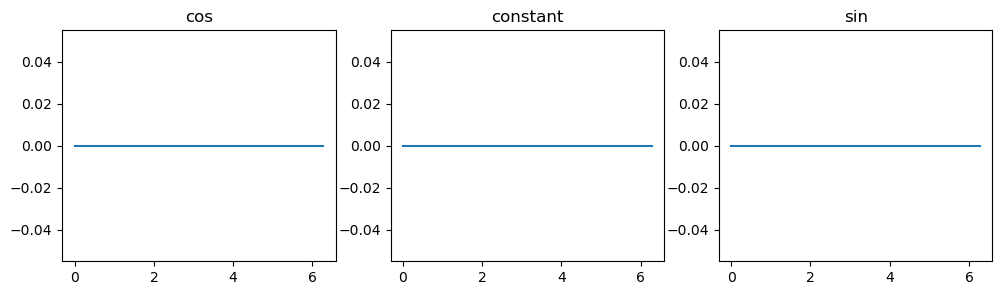

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            nan             0.e+00         
Worst:          0.e+00          0.e+00         
Std             nan             0.e+00         
Total imaginary component
0.0

ichi
Difference


/Users/lanke/Desktop/Second year project/Code/python_source/chiphifunc_test_suite.py:96: ComplexWarning: Casting complex values to real discards the imaginary part
  A_content_padded[a_pad_row:shape[0]-a_pad_row,a_pad_col:shape[1]-a_pad_col] = A.content
/Users/lanke/Desktop/Second year project/Code/python_source/chiphifunc_test_suite.py:97: ComplexWarning: Casting complex values to real discards the imaginary part
  B_content_padded[b_pad_row:shape[0]-b_pad_row,b_pad_col:shape[1]-b_pad_col] = B.content
/Users/lanke/Desktop/Second year project/Code/python_source/chiphifunc_test_suite.py:105: RuntimeWarning: invalid value encountered in true_divide
  frac = np.abs((guess-ans)/ans)


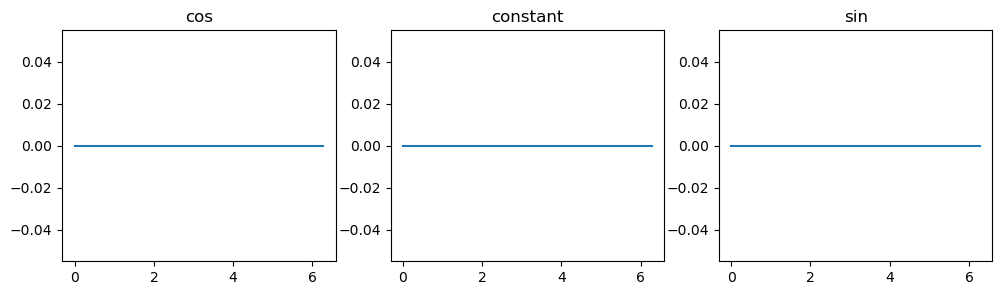

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            nan             0.e+00         
Worst:          0.e+00          0.e+00         
Std             nan             0.e+00         
Total imaginary component
0.0



In [2]:
print('Testing dchi and ichi (even)')
rands_i = np.random.randint(1,5, size=12)
max_phi_mode_i = np.max(np.array([rands_i[0],rands_i[2],rands_i[1],rands_i[3]]))

test1 = ChiPhiFunc(np.array([
        np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points), 
        np.zeros_like(points, dtype=np.complex128),
        np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points)
]), max_phi_mode_i, fourier_mode = True)

dchi_test1 = ChiPhiFunc(np.array([
        -2*(np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points)), 
        np.zeros_like(points, dtype=np.complex128),
        2*(np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points))
]), max_phi_mode_i, fourier_mode = True)

guess_dchi = diff(test1,'chi',1)
guess_ichi = int_chi(dchi_test1)
print('dchi')
compare_chiphifunc(guess_dchi, dchi_test1)
print('ichi')
compare_chiphifunc(guess_ichi, test1)

Testing dchi and ichi (odd)
dchi
Difference


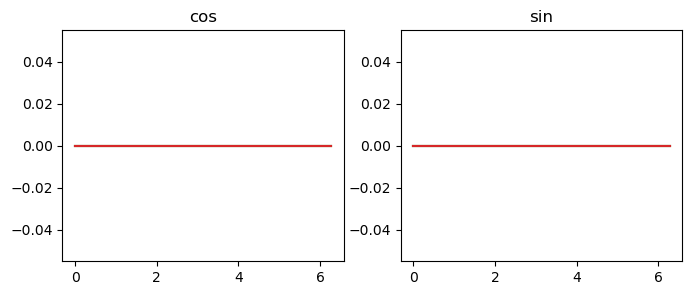

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            nan             0.e+00         
Worst:          0.e+00          0.e+00         
Std             nan             0.e+00         
Total imaginary component
0.0

ichi
Difference


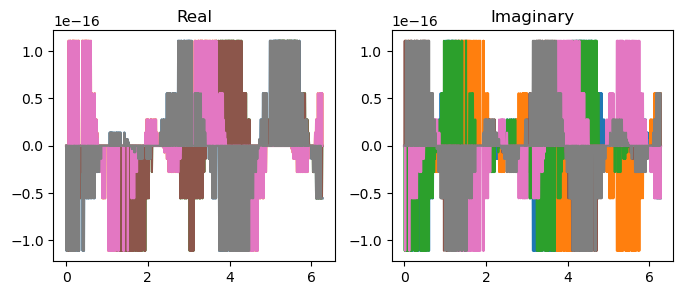

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            nan             1.484e-17      
Worst:          2.218e-16       1.110e-16      
Std             nan             3.375e-17      
Total imaginary component
0.0



In [6]:
print('Testing dchi and ichi (odd)')
rands_i = np.random.randint(1,5, size=8)
max_phi_mode_i = np.max(np.array([rands_i[0],
    rands_i[1],
    rands_i[2],
    rands_i[3],
    rands_i[4],
    rands_i[5],
    rands_i[6],
    rands_i[7]]))

test1 = ChiPhiFunc(np.array([
        np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points), 
        np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points), 
        np.sin(rands_i[4]*points)+np.cos(rands_i[5]*points), 
        np.sin(rands_i[6]*points)+np.cos(rands_i[7]*points),
        np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points), 
        np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points), 
        np.sin(rands_i[4]*points)+np.cos(rands_i[5]*points), 
        np.sin(rands_i[6]*points)+np.cos(rands_i[7]*points)
]), max_phi_mode_i, fourier_mode = True)

dchi_test1 = ChiPhiFunc(np.array([
        -7*(np.sin(rands_i[6]*points)+np.cos(rands_i[7]*points)), 
        -5*(np.sin(rands_i[4]*points)+np.cos(rands_i[5]*points)), 
        -3*(np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points)), 
        -1*(np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points)),
        1*(np.sin(rands_i[6]*points)+np.cos(rands_i[7]*points)), 
        3*(np.sin(rands_i[4]*points)+np.cos(rands_i[5]*points)), 
        5*(np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points)), 
        7*(np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points))
]), max_phi_mode_i, fourier_mode = True)

guess_dchi = diff(test1,'chi',1)
guess_ichi = int_chi(dchi_test1)
print('dchi')
compare_chiphifunc(guess_dchi, dchi_test1)
print('ichi')
compare_chiphifunc(guess_ichi, test1, fourier_mode = False)

Testing dphi
Current derivative modes: fft
Current integral modes: fft
dphi based on FFT
Difference


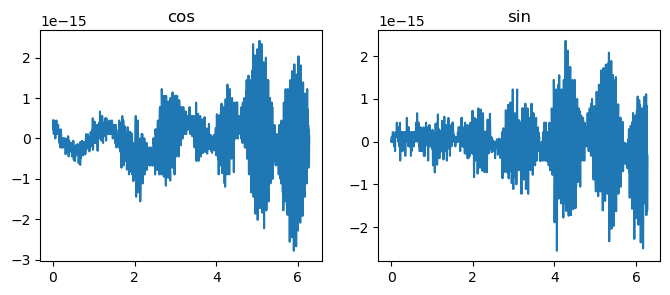

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             2.491e-16      
Worst:          inf             1.443e-15      
Std             nan             2.321e-16      
Total imaginary component
0.0

dphi based on pseudo-spectral
Difference


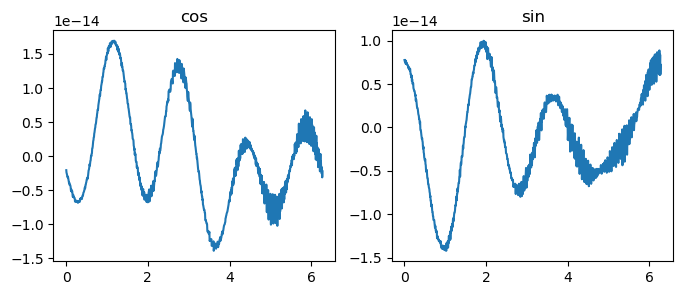

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             3.131e-15      
Worst:          inf             8.549e-15      
Std             nan             2.254e-15      
Total imaginary component
0.0

spline
Difference


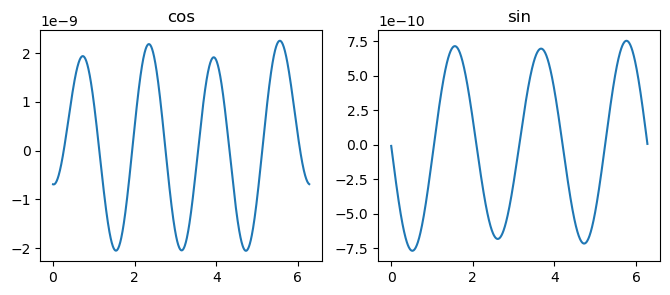

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             6.198e-10      
Worst:          inf             1.126e-09      
Std             nan             3.312e-10      
Total imaginary component
0.0



In [14]:
print('Testing dphi')
chiphifunc.diff_mode = 'fft'
print('Current derivative modes:', chiphifunc.diff_mode)
print('Current integral modes:', chiphifunc.integral_mode)
rands_i = np.random.randint(1,5, size=12)
max_phi_mode_diff = np.max(np.array([rands_i[0],
    rands_i[1],
    rands_i[2],
    rands_i[3]]))
test_diff = ChiPhiFunc(np.array([
        -1/rands_i[0]*np.cos(rands_i[0]*points) + 1/rands_i[1]*np.sin(rands_i[1]*points) +1/rands_i[0]*np.cos(0),
        -1/rands_i[2]*np.cos(rands_i[2]*points) + 1/rands_i[3]*np.sin(rands_i[3]*points) +1/rands_i[2]*np.cos(0)
]), max_phi_mode_diff, fourier_mode = True)

ans = ChiPhiFunc(np.array([
        np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points), 
        np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points)
]), max_phi_mode_diff, fourier_mode = True)

guess_fft = diff(test_diff,'phi',1)
guess_pseudo_spectral = test_diff.dphi(mode = 'pseudo_spectral')
guess_spline = test_diff.dphi(mode = 'spline')
print('dphi based on FFT')
compare_chiphifunc(guess_fft, ans)
print('dphi based on pseudo-spectral')
dphi_op = dphi_op_pseudospectral(n_grid_phi)
compare_chiphifunc(guess_pseudo_spectral, ans)
print('spline')
compare_chiphifunc(guess_spline, ans)

Testing integrate_phi
Testing periodic: simpson
simpson
Error type:     Fractional      Total          
Avg:            1.348e+00       2.587e-16      
Worst:          2.173e+00       4.825e-16      
Std             5.834e-01       1.582e-16      
Total imaginary component
0.0

Testing periodic: spline
Error type:     Fractional      Total          
Avg:            2.134e+04       4.043e-12      
Worst:          3.197e+04       7.098e-12      
Std             7.516e+03       2.160e-12      
Total imaginary component
0.0

Testing general
simpson
Simpson v. ans
Difference


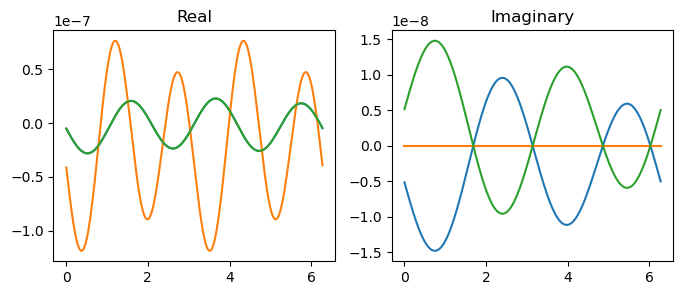

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             2.837e-08      
Worst:          inf             1.188e-07      
Std             nan             2.724e-08      
Total imaginary component
0.0

Spline v. ans
Difference


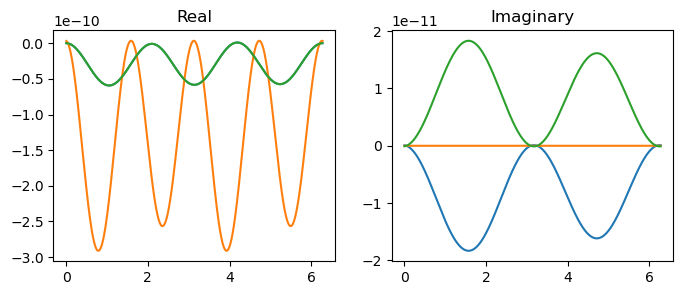

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             6.460e-11      
Worst:          inf             2.912e-10      
Std             nan             7.762e-11      
Total imaginary component
0.0

FFT v. ans
Difference


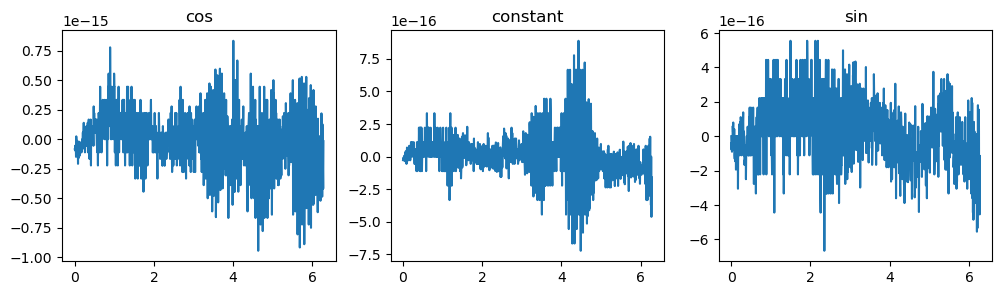

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            nan             1.091e-16      
Worst:          inf             8.882e-16      
Std             nan             1.034e-16      
Total imaginary component
0.0



In [12]:
print('Testing integrate_phi')
rands_i = np.random.randint(1,5, size=12)
max_phi_mode_i = np.max(np.array([rands_i[0],
    rands_i[1],
    rands_i[2],
    rands_i[3],
    rands_i[4],
    rands_i[5]]))
test_integral = ChiPhiFunc(np.array([
        np.sin(rands_i[0]*points)+np.cos(rands_i[1]*points), 
        np.sin(rands_i[2]*points)+np.cos(rands_i[3]*points), 
        np.sin(rands_i[4]*points)+np.cos(rands_i[5]*points)
]), max_phi_mode_i, fourier_mode = True)

ans = ChiPhiFunc(np.array([
        -1/rands_i[0]*np.cos(rands_i[0]*points) + 1/rands_i[1]*np.sin(rands_i[1]*points) +1/rands_i[0],
        -1/rands_i[2]*np.cos(rands_i[2]*points) + 1/rands_i[3]*np.sin(rands_i[3]*points) +1/rands_i[2],
        -1/rands_i[4]*np.cos(rands_i[4]*points) + 1/rands_i[5]*np.sin(rands_i[5]*points) +1/rands_i[4]
]), max_phi_mode_i, fourier_mode = True)


ans_2pi = ChiPhiFunc(np.array([
        [-1/rands_i[0]*np.cos(rands_i[0]*2*np.pi) + 1/rands_i[1]*np.sin(rands_i[1]*2*np.pi) +1/rands_i[0]*np.cos(0)],
        [-1/rands_i[2]*np.cos(rands_i[2]*2*np.pi) + 1/rands_i[3]*np.sin(rands_i[3]*2*np.pi) +1/rands_i[2]*np.cos(0)],
        [-1/rands_i[4]*np.cos(rands_i[4]*2*np.pi) + 1/rands_i[5]*np.sin(rands_i[5]*2*np.pi) +1/rands_i[4]*np.cos(0)]
]),0 , fourier_mode = True)
print('Testing periodic: simpson')
print_fractional_error(test_integral.integrate_phi(periodic=True, mode = 'simpson').content,ans_2pi.content)
print('Testing periodic: spline')
print_fractional_error(test_integral.integrate_phi(periodic=True, mode = 'spline').content,ans_2pi.content)

print('Testing general')
guess = test_integral.integrate_phi(periodic=False, mode='simpson')
guess_spline = test_integral.integrate_phi(periodic=False, mode='spline')
guess_fft = test_integral.integrate_phi(periodic=False, mode='fft')

print('Simpson v. ans')
compare_chiphifunc(guess, ans, fourier_mode = False)
print('Spline v. ans')
compare_chiphifunc(guess_spline, ans, fourier_mode = False)
print('FFT v. ans')
compare_chiphifunc(guess_fft, ans)


0

## Testing ODE solvers

In [5]:
# Creating 2 random ChiPhiFunc's for testing
rands1 = np.random.randint(5, size=16)
max_phi_mode = np.max(np.array([rands1[1],
    rands1[3],
    rands1[5],
    rands1[7],
    rands1[9],
    rands1[11],
    rands1[13],
    rands1[15]]))
content1 = np.array([
    rands1[0]/10*np.sin(rands1[1]*points) + rands1[2]/10*np.cos(rands1[3]*points),
    rands1[4]/10*np.sin(rands1[5]*points) + rands1[6]/10*np.cos(rands1[7]*points),
    rands1[8]/10*np.sin(rands1[9]*points) + rands1[10]/10*np.cos(rands1[11]*points),
    rands1[12]/10*np.sin(rands1[13]*points) + rands1[14]/10*np.cos(rands1[15]*points)
])
test1 = ChiPhiFunc(content1, max_phi_mode, fourier_mode = True)
iota = np.random.rand()# rational: np.random.randint(1,5)/np.random.randint(1,5)
# dphi + iota*dchi
dphi_test1 = ChiPhiFunc(np.array([
    rands1[1]*rands1[0]/10*np.cos(rands1[1]*points) - rands1[3]*rands1[2]/10*np.sin(rands1[3]*points),
    rands1[5]*rands1[4]/10*np.cos(rands1[5]*points) - rands1[7]*rands1[6]/10*np.sin(rands1[7]*points),
    rands1[9]*rands1[8]/10*np.cos(rands1[9]*points) - rands1[11]*rands1[10]/10*np.sin(rands1[11]*points),
    rands1[13]*rands1[12]/10*np.cos(rands1[13]*points) - rands1[15]*rands1[14]/10*np.sin(rands1[15]*points)
]), max_phi_mode, fourier_mode = True)

dchi_test1 = ChiPhiFunc(np.array([
    -3*(rands1[12]/10*np.sin(rands1[13]*points) + rands1[14]/10*np.cos(rands1[15]*points)),
    -(rands1[8]/10*np.sin(rands1[9]*points) + rands1[10]/10*np.cos(rands1[11]*points)),
    rands1[4]/10*np.sin(rands1[5]*points) + rands1[6]/10*np.cos(rands1[7]*points),
    3*(rands1[0]/10*np.sin(rands1[1]*points) + rands1[2]/10*np.cos(rands1[3]*points))
]), max_phi_mode, fourier_mode = True)


In [ ]:
print('Testing general integrating factor')
# By trying different amplitudes above, the theeshold of 
# instability seems to be 17.
start_time = time.time()
a = 100*np.array([5*np.e**(2j*points),
              np.e**(1j*points), 
              np.e**(3j*points), 
              np.e**(4j*points)], dtype = np.complex128)+0.5
b = 1
RHS = a*test1.content+b*dphi_test1.content
guess_batch_asymp = solve_integration_factor(a,b,RHS,integral_mode='asymptotic')
print("Batch asymptotic time(s):",(time.time() - start_time))
compare_chiphifunc(ChiPhiFunc(guess_batch_asymp),test1)

# By trying different amplitudes above, the theeshold of 
# instability seems to be 17.
start_time = time.time()
a = 1*np.array([5*np.e**(2j*points),
              np.e**(1j*points), 
              np.e**(3j*points), 
              np.e**(4j*points)], dtype = np.complex128)+0.5
b = 1
RHS = a*test1.content+b*dphi_test1.content
guess_batch_asymp = solve_integration_factor(a,b,RHS,integral_mode='fft')
print("Batch fft time(s):",(time.time() - start_time))
compare_chiphifunc(ChiPhiFunc(guess_batch_asymp),test1)

# By trying different amplitudes above, the theeshold of 
# instability seems to be 17.
start_time = time.time()
RHS = a*test1.content+b*dphi_test1.content
guess_batch_asymp = solve_integration_factor(a,b,RHS,integral_mode='spline')
print("Batch spline time(s):",(time.time() - start_time))
compare_chiphifunc(ChiPhiFunc(guess_batch_asymp),test1)

start_time = time.time()
RHS = a*test1.content+b*dphi_test1.content
guess_batch_int = solve_integration_factor(a,b,RHS,integral_mode='spline')
print("Batch double-spline time(s):",(time.time() - start_time))
compare_chiphifunc(ChiPhiFunc(guess_batch_int),test1)

start_time = time.time()
a = np.array([50*np.e**(2j*points),
              np.e**(1j*points), 
              20*np.e**(3j*points), 
              np.e**(4j*points)], dtype = np.complex128)+0.5
b = 1
RHS = a*test1.content+b*dphi_test1.content
guess_ind = solve_integration_factor(a,b,RHS)
print("individual time(s):",(time.time() - start_time))
compare_chiphifunc(ChiPhiFunc(guess_ind),test1)



Testing general integrating factor


ValueError: + can only be evaluated between 2 ChiPhiFuncs that are both even or odd

Testing solve_dphi_iota_dchi
Simpson mode
solve_integration_factor: average p_eff: 0.7260214809570331
solve_integration_factor: average f_eff: 0.4296680938735775
integral_mode is simpson
simpson
int_p
[[0.+0.00000000e+00j 0.-6.84259125e-03j 0.-1.36851825e-02j ...
  0.-6.82890607e+00j 0.-6.83574866e+00j 0.-6.84259125e+00j]
 [0.+0.00000000e+00j 0.-2.28086375e-03j 0.-4.56172750e-03j ...
  0.-2.27630202e+00j 0.-2.27858289e+00j 0.-2.28086375e+00j]
 [0.+0.00000000e+00j 0.+2.28086375e-03j 0.+4.56172750e-03j ...
  0.+2.27630202e+00j 0.+2.27858289e+00j 0.+2.28086375e+00j]
 [0.+0.00000000e+00j 0.+6.84259125e-03j 0.+1.36851825e-02j ...
  0.+6.82890607e+00j 0.+6.83574866e+00j 0.+6.84259125e+00j]]
f_looped
[[1.31113955+1.04732003j 1.31794397+1.02102418j 1.32402296+0.99436732j
  ... 1.29536422+1.09878443j 1.30361205+1.07324377j
  1.31113955+1.04732003j]
 [0.6344482 +0.57148388j 0.62711985+0.57030827j 0.61949842+0.56890532j
  ... 0.64822215+0.57315028j 0.64148254+0.57243142j
  0.6344482 +0.57148388j]

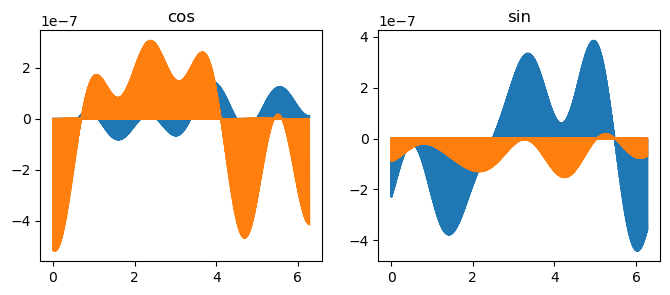

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             3.382e-08      
Worst:          inf             2.59e-07       
Std             nan             5.544e-08      
Total imaginary component
0.0

Spline mode
solve_integration_factor: average p_eff: 0.7260214809570331
solve_integration_factor: average f_eff: 0.4296680938735775
integral_mode is spline
int_p
[[0.+0.00000000e+00j 0.-6.84259125e-03j 0.-1.36851825e-02j ...
  0.-6.82890607e+00j 0.-6.83574866e+00j 0.-6.84259125e+00j]
 [0.+0.00000000e+00j 0.-2.28086375e-03j 0.-4.56172750e-03j ...
  0.-2.27630202e+00j 0.-2.27858289e+00j 0.-2.28086375e+00j]
 [0.+0.00000000e+00j 0.+2.28086375e-03j 0.+4.56172750e-03j ...
  0.+2.27630202e+00j 0.+2.27858289e+00j 0.+2.28086375e+00j]
 [0.+0.00000000e+00j 0.+6.84259125e-03j 0.+1.36851825e-02j ...
  0.+6.82890607e+00j 0.+6.83574866e+00j 0.+6.84259125e+00j]]
f_looped
[[1.31113955+1.04732003j 1.31794397+1.02102418j 1.32402296+0.99436

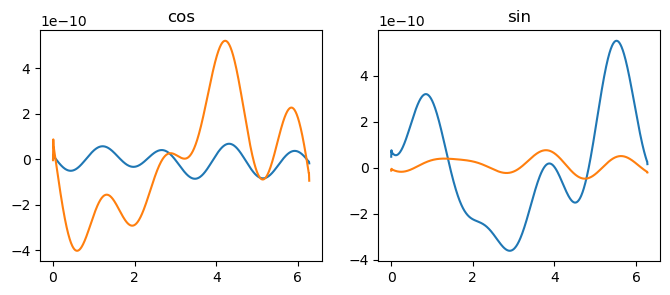

fractional errors b/w data and general formula
Error type:     Fractional      Total          
Avg:            inf             5.747e-11      
Worst:          inf             2.607e-10      
Std             nan             6.463e-11      
Total imaginary component
0.0



In [8]:
print('Testing solve_dphi_iota_dchi')

print('Simpson mode')
test1_guess = solve_dphi_iota_dchi(iota, (dphi_test1+iota*dchi_test1).content, integral_mode = 'simpson')
compare_chiphifunc(ChiPhiFunc(test1_guess),test1)


print('Spline mode')
test1_guess = solve_dphi_iota_dchi(iota, (dphi_test1+iota*dchi_test1).content)
compare_chiphifunc(ChiPhiFunc(test1_guess),test1)

In [17]:
np.fft.fftfreq(100)

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49, -0.5 , -0.49, -0.48, -0.47,
       -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4 , -0.39, -0.38,
       -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3 , -0.29,
       -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2 ,
       -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11,
       -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01])